<a href="https://colab.research.google.com/github/Rohit-Nikam/Machine_Learning-CAP-5610-/blob/master/program2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import keras
from keras.datasets import mnist
from sklearn.model_selection import StratifiedShuffleSplit

Using TensorFlow backend.


In [2]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

11493376/11490434 [==============================] - 1s 0us/step


In [0]:
X_train = (X_train.reshape(X_train.shape[0],X_train.shape[1]*X_train.shape[2]))
X_test = (X_test.reshape(X_test.shape[0],X_test.shape[1]*X_test.shape[2]))

In [0]:
test_target = y_test
y_train = (keras.utils.to_categorical(y_train,10))
y_test = (keras.utils.to_categorical(y_test,10))

In [5]:
print('Shape of training set predictors :',X_train.shape)
print('Shape of training set target :',y_train.shape)
print('Shape of testing set predictors :',X_test.shape)
print('Shape of testing set target :',y_test.shape)

Shape of training set predictors : (60000, 784)
Shape of training set target : (60000, 10)
Shape of testing set predictors : (10000, 784)
Shape of testing set target : (10000, 10)


In [0]:
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255

In [0]:
### theta and bias initilization
theta = np.random.randn(10,784)*0.01
bias = np.random.randn(10,1)


In [8]:
## we are training a number 9 classifier
epochs = 50
m = len(X_train)
learning_rate = 0.005
batch_size = 200
result_loss = []


def binary_loss(yi,sigma):
    return np.sum(np.multiply(np.transpose(yi),np.log(sigma))+np.multiply(np.transpose(yi),np.log(sigma)),axis=1,keepdims=True)/len(yi)
  
  
def sigmoid(t):
    return 1/(1+np.exp(-t))

def loss_function(theta,bias,xi,yi):   #here xi is transposed
    #print('here')
    z = np.dot(theta,np.transpose(xi)) + bias
    sigma = sigmoid(z)
    #print('shape :', z.shape,sigma.shape)
    #diff_sigma = sigmoid(sigma)   #
    penalty = sigma - np.transpose(yi)
    diff_loss = np.dot(penalty,xi)     #
    diff_bias = np.sum(penalty)
    loss_training = binary_loss(yi,sigma)
    return loss_training,diff_loss,diff_bias         #
    
    
for epoch in range(epochs):
    shuffled_indices = np.random.permutation(m)       
    X_train = X_train[shuffled_indices]
    y_train = y_train[shuffled_indices]
    loss_list = []
    for i in range(0,m,batch_size):
        random_index = np.random.randint(m-(batch_size+2))
        xi = X_train[random_index:random_index+batch_size]
        yi = y_train[random_index:random_index+batch_size]
        loss_training,diff_loss,diff_bias = loss_function(theta,bias,xi,yi)
        theta = theta - learning_rate * diff_loss
        bias = bias - learning_rate * diff_bias
        loss_list.append(loss_training)
    result_loss.append(np.array((loss_list)).mean())
theta_min = theta 
bias_min = bias
print('success')

success


In [0]:
### testing our theta optimum on test data
z = np.dot(theta_min,np.transpose(X_test)) + bias_min
sigma = sigmoid(z)
test_output = np.transpose(sigma)


# **The Accuracy of the model is :**

In [10]:
reverse_encoding = [np.argmax(test_output[i]) for i in range(len(test_output))]
checking_accuracy = [1 for i in range(len(y_test)) if reverse_encoding[i] == test_target[i]]
acc = np.sum(checking_accuracy)/100
print("accuracy:",acc)

accuracy: 91.36


# **As the epoch increases the loss decreases**

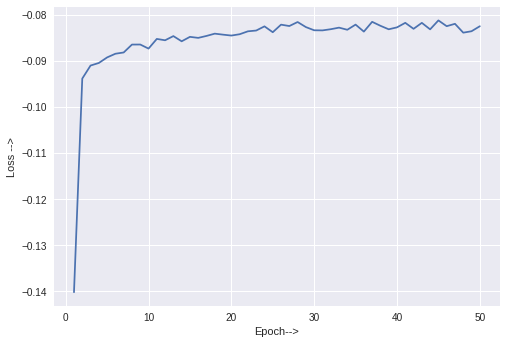

In [11]:
accuracy_plot = plt.plot(range(1,epochs +1),result_loss)
plt.xlabel('Epoch-->')
plt.ylabel('Loss -->')
plt.show(accuracy_plot)